# DESAFIO SPRINT  3

### O objetivo é a prática de Python combinando conhecimentos adquiridos no PB.

# Leia o arquivo csv googlestore e realize as seguintes atividades sobre o dataset utilizando as bibliotecas Pandas e Matplotlib. Remova as linhas duplicadas.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Remover linhas duplicadas
data.drop_duplicates(inplace=True)0

# Faça um gráfico de barras contendo os top 5 apps por números de instalações.

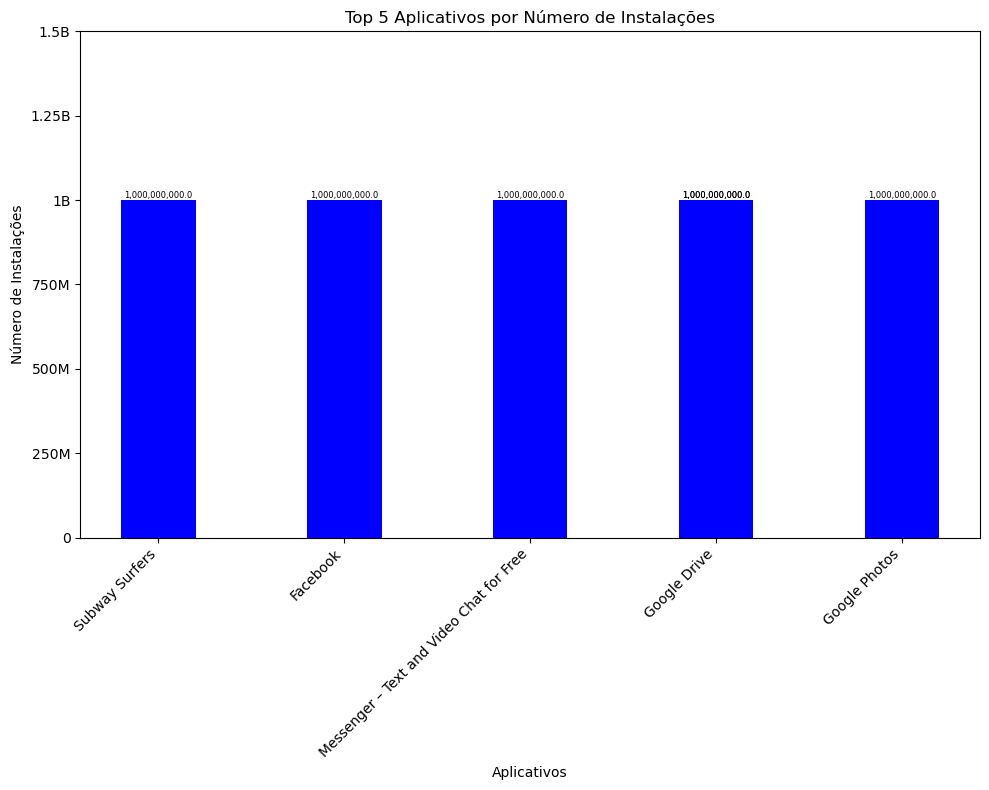

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def autolabel(bars):
    """Função para adicionar rótulos automáticos acima de cada barra."""
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}', ha='center', va='bottom', fontsize=6)

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Remover caracteres não numéricos da coluna 'Installs' e converter para int
data['Installs'] = data['Installs'].str.replace('[^\d]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Installs'
data.dropna(subset=['Installs'], inplace=True)

# Ordenar o DataFrame pelo número de instalações em ordem decrescente
sorted_data = data.sort_values(by='Installs', ascending=False)

# Selecionar os cinco primeiros aplicativos
top_apps = sorted_data.head(6)

# Criar um gráfico de barras
plt.figure(figsize=(10, 8))  # Alterando o tamanho do gráfico
bars = plt.bar(top_apps['App'], top_apps['Installs'], color='b', width=0.4)  # Reduzindo a largura das barras

# Adicionar rótulos automáticos acima de cada barra
autolabel(bars)

# Definir os intervalos do eixo y
plt.yticks(range(0, 1500000001, 250000000), ['0', '250M', '500M', '750M', '1B', '1.25B', '1.5B'])

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos e título
plt.xlabel('Aplicativos')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Aplicativos por Número de Instalações')

# Exibir o gráfico
plt
plt.tight_layout()
plt.show()

# Faça um gráfico de pizza (Pie Chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem 

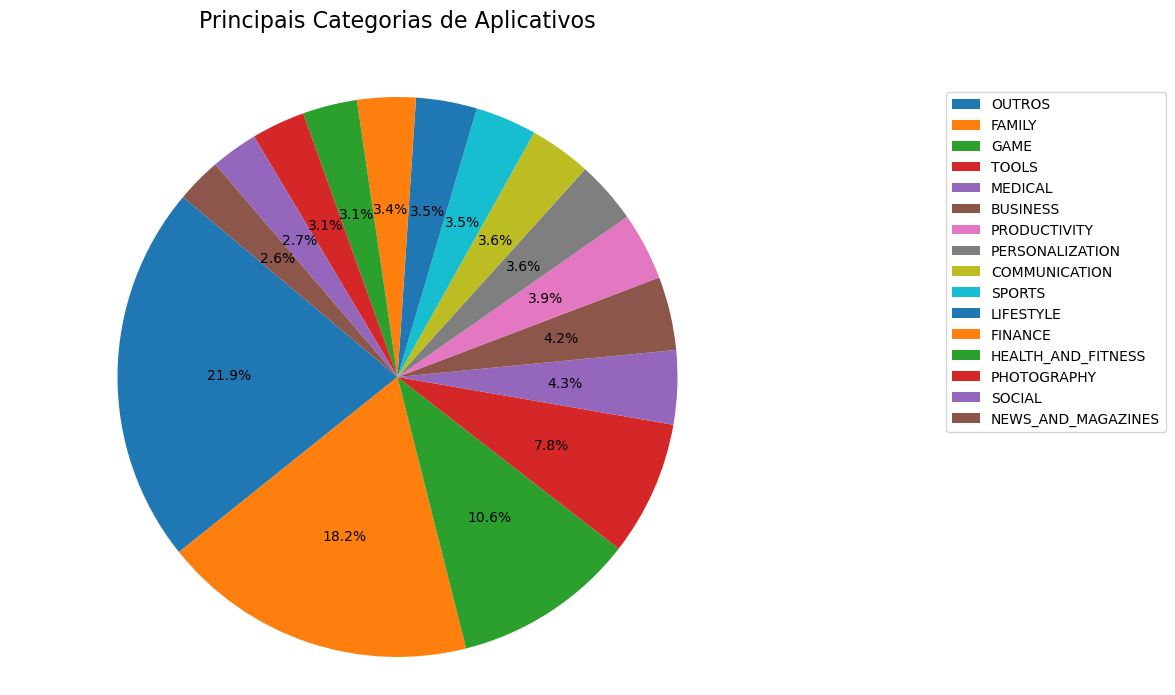

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Remover linhas duplicadas
data.drop_duplicates(inplace=True)

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Remover valores numéricos no campo 'Category'
data['Category'] = data['Category'].str.replace('\d+', '', regex=True)

# Contagem de aplicativos por categoria
category_counts = data['Category'].value_counts()

# Selecionar as principais categorias
top_categories = category_counts.head(15).index

# Criar uma nova categoria chamada 'OUTROS' para agrupar as outras categorias
data.loc[~data['Category'].isin(top_categories), 'Category'] = 'OUTROS'

# Recalcular a contagem de aplicativos por categoria após agrupar em 'OUTROS'
category_counts = data['Category'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=[''] * len(category_counts), autopct='%1.1f%%', startangle=140)
plt.title('Principais Categorias de Aplicativos', fontsize=16, pad=30)  # Ajustar tamanho da fonte e espaço entre o título e o gráfico
plt.axis('equal')  # Para manter o aspecto circular

# Posicionar a legenda 
plt.legend(category_counts.index, loc='lower right', bbox_to_anchor=(1.5, 0.4))

plt.show()


##### Neste gráfico, optei por colocar as categorias com porcentagem abaixo de 2,6% em um grupo chamado OUTROS. O gráfico de pizza tem um problema pois com muitas categorias ele acaba ficando um pouco poluido, então resolvi fazer isto para ficar um gráfico mais agradavel

# Mostre qual o app mais caro existente no dataset

In [151]:

# Filtrar apenas os valores numéricos na coluna 'Price' no formato $0.00
numeric_prices = data['Price'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Encontrar o índice do aplicativo mais caro
indice_aplicativo_mais_caro = numeric_prices.idxmax()

# Obter o nome e o preço do aplicativo mais caro
app_mais_caro_nome = data.loc[indice_aplicativo_mais_caro, 'App']
app_mais_caro_preco = data.loc[indice_aplicativo_mais_caro, 'Price']

print("O aplicativo mais caro existente no dataset é  ")
print(app_mais_caro_nome.values[0], app_mais_caro_preco.values[0])



O aplicativo mais caro existente no dataset é  
I'm Rich - Trump Edition $400.00


# Mostre quantos apps são classificados como 'Mature 17+'

In [31]:


# Contar o número de aplicativos classificados como 'Mature 17+'
num_apps_mature_17plus = (data['Content Rating'] == 'Mature 17+').sum()

print("Número de aplicativos classificados como 'Mature 17+':", num_apps_mature_17plus)

Número de aplicativos classificados como 'Mature 17+': 499


# Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por números de reviews

In [239]:
import pandas as pd

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Remover linhas duplicadas
data.drop_duplicates(inplace=True)

# Converter a coluna 'Reviews' para o tipo numérico
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Ordenar o DataFrame pelo número de views em ordem decrescente
sorted_data = data.sort_values(by='Reviews', ascending=False)

# Selecionar os 10 aplicativos com mais views
top_10_apps_reviews = sorted_data.head(10)[['App', 'Reviews']]

print("Top 10 aplicativos por número de reviews:")
print(top_10_apps_reviews)


Top 10 aplicativos por número de reviews:
                                           App     Reviews
2544                                  Facebook  78158306.0
3943                                  Facebook  78128208.0
336                         WhatsApp Messenger  69119316.0
3904                        WhatsApp Messenger  69109672.0
2604                                 Instagram  66577446.0
2545                                 Instagram  66577313.0
3909                                 Instagram  66509917.0
382   Messenger – Text and Video Chat for Free  56646578.0
335   Messenger – Text and Video Chat for Free  56642847.0
1879                            Clash of Clans  44893888.0


# Crie pelo menos mais dois cálculos sobre o dataset e apresente um em formato de lista e o outro em formato de valor.

## 1. Cálculo do top 20 generos de aplicativos por Números de aplicativos

In [18]:
import pandas as pd

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Contar o número de aplicativos em cada categoria
category_counts = data['Genres'].value_counts().head(20)

# Adicionar uma legenda
print("Top 20 Generos de Aplicativos por Número de Aplicativos:")
print(category_counts)



Top 20 Generos de Aplicativos por Número de Aplicativos:
Genres
Tools                842
Entertainment        623
Education            549
Medical              463
Business             460
Productivity         424
Sports               398
Personalization      392
Communication        387
Lifestyle            381
Finance              366
Action               365
Health & Fitness     341
Photography          335
Social               295
News & Magazines     283
Shopping             260
Travel & Local       257
Dating               234
Books & Reference    231
Name: count, dtype: int64


## 2. A Classificação de Conteúdo (Content Rating) com o maior número de aplicativos

In [28]:
import pandas as pd

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Contar o número de aplicativos para cada valor único de Content Rating
content_rating_counts = data['Content Rating'].value_counts()

# Encontrar o Content Rating com o maior número de aplicativos
max_content_rating = content_rating_counts.idxmax()
max_content_rating_count = content_rating_counts.max()

print("A Classificação de Conteúdo com Maior Número de Aplicativos:")
print(f"{max_content_rating} com {max_content_rating_count} aplicativos.")


A Classificação de Conteúdo com Maior Número de Aplicativos:
Everyone com 8714 aplicativos.


# Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca Matplotlib.

## 1.Gráfico de linhas mostrando a quantidade de atualizações por data de última atualização.


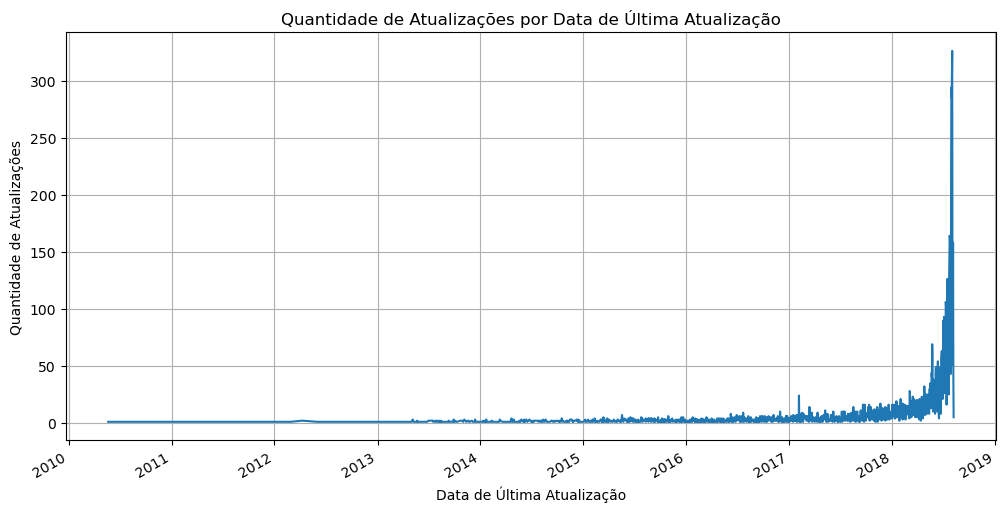

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Remover entradas com formato de data inválido
data = data[data['Last Updated'].str.match(r'[A-Za-z]+\s\d+,\s\d{4}')]

# Converter a coluna "Last Updated" para o tipo de dados DateTime
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

# Remover linhas com datas nulas (caso haja)
data = data.dropna(subset=['Last Updated'])

# Agrupar os dados pela data de "Last Updated" e contar o número de ocorrências
updates_by_date = data.groupby('Last Updated').size()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
updates_by_date.plot(kind='line')
plt.title('Quantidade de Atualizações por Data de Última Atualização')
plt.xlabel('Data de Última Atualização')
plt.ylabel('Quantidade de Atualizações')
plt.grid()
plt.show()



## 2.Gráfico de dispersão mostrando a média de instalações de aplicativos por gênero

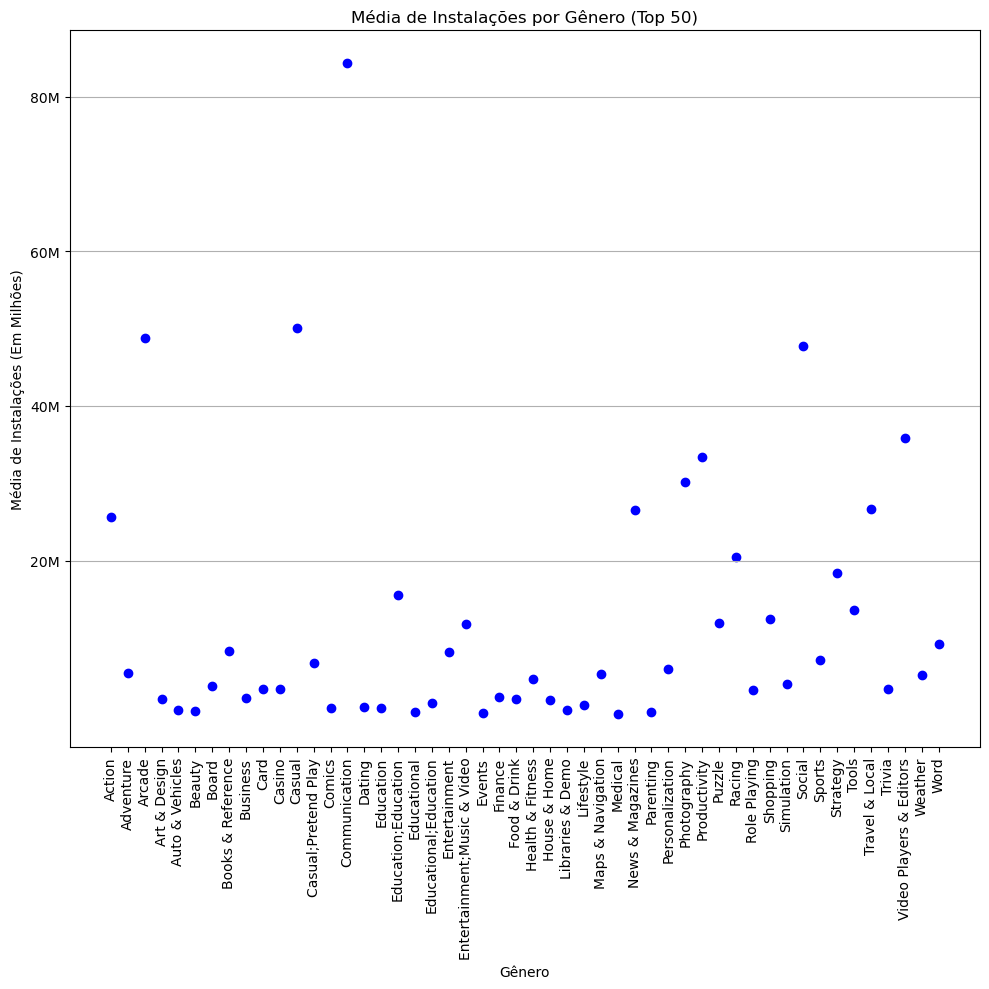

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv('googleplaystore.csv')

# Remover caracteres não numéricos da coluna 'Installs' e converter para int
data['Installs'] = data['Installs'].str.replace('[^\d]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Remover linhas com valores NaN na coluna 'Installs'
data.dropna(subset=['Installs'], inplace=True)

# Contar o número de aplicativos em cada gênero
genre_counts = data['Genres'].value_counts()

# Selecionar os 10 gêneros mais comuns
top_genres = genre_counts.head(50).index

# Filtrar os dados para incluir apenas os 10 gêneros mais comuns
data_top_genres = data[data['Genres'].isin(top_genres)]

# Agrupar os dados filtrados pela coluna 'Genres' e calcular a média de instalações para cada gênero
avg_installs_by_genre = data_top_genres.groupby('Genres')['Installs'].mean().reset_index()

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 10))
plt.scatter(avg_installs_by_genre['Genres'], avg_installs_by_genre['Installs'], color='blue')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.yticks([20e6, 40e6, 60e6, 80e6], ['20M', '40M', '60M', '80M'])  # Definir os marcadores do eixo y
plt.xlabel('Gênero')
plt.ylabel('Média de Instalações (Em Milhões)')
plt.title('Média de Instalações por Gênero (Top 50)')
plt.gca().yaxis.grid(True)  # Adiciona linhas da grade apenas no eixo y
plt.tight_layout()
plt.show()



In [13]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
